<a href="https://colab.research.google.com/github/rpablogomes/bootcamp-launchbase-desafios-05/blob/master/ADA_Analyses.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#--------------------------------------------------
# Importanto as bibliotecas Python necessarias ao experimento
# Manipulacao matricial, matemática e visualizacao grafica
#--------------------------------------------------
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from math import sqrt
#--------------------------------------------------
# Processamento dos dados
#--------------------------------------------------
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
#--------------------------------------------------
# Carregando o modelo inteligente e as metricas de desempenho
#--------------------------------------------------
from sklearn.neural_network import MLPClassifier
from sklearn.neural_network import MLPRegressor

from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.metrics import classification_report,confusion_matrix

from sklearn.ensemble import AdaBoostClassifier

from sklearn.model_selection import GridSearchCV

from sklearn.preprocessing import StandardScaler

#--------------------------------------------------
# Carregando o modelo inteligente e as metricas de desempenho
#--------------------------------------------------

#--------------------------------------------------
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

ModuleNotFoundError: No module named 'CNNFearAndGreedIndex'

In [ ]:
ada_fear = pd.read_excel('/content/sample_data/ada_fear.xlsx')

ada_fear = ada_fear.drop('Unnamed: 0', axis=1)

ada_fear.to_csv('/content/sample_data/ada_emotions.csv', index=False)

ada_fear.head()

,Timestamp,One,Two,Three
0,1577868600,0.033048,0.000005,0.000254
1,1577955000,0.033169,0.000005,0.000255
2,1578041400,0.033951,0.000005,0.000257
3,1578127800,0.034046,0.000005,0.000254
4,1578214200,0.034398,0.000005,0.000254


**Importacao de Dados**

Neste passo, é importado os dados das features da base de dados.

In [ ]:
ada_bd = pd.read_csv('/content/sample_data/ada.csv', sep=',')

btc_bd = pd.read_csv('/content/sample_data/bitcoin.csv', sep=',')
btc_dominance = pd.read_csv('/content/sample_data/bitcoin_dominance.csv', sep=',')
btc_volatility = pd.read_csv('/content/sample_data/bitcoin_volatility.csv', sep=',')

marketcap_market = pd.read_csv('/content/sample_data/marketcap_market.csv', sep=',')

sep500 = pd.read_csv('/content/sample_data/sep500.csv', sep=',')



https://api.coin-stats.com/v2/fear-greed?type=all



# sentimento de mercado de btc e economia geral, macroeconomia e se possivel, pesquisa sobre btc na internet


sep500.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2020-01-02,3244.669922,3258.139893,3235.530029,3257.850098,3257.850098,3459930000
1,2020-01-03,3226.360107,3246.149902,3222.340088,3234.850098,3234.850098,3484700000
2,2020-01-06,3217.550049,3246.840088,3214.639893,3246.280029,3246.280029,3702460000
3,2020-01-07,3241.860107,3244.909912,3232.429932,3237.179932,3237.179932,3435910000
4,2020-01-08,3238.590088,3267.070068,3236.669922,3253.050049,3253.050049,3726840000


**Shape do Dados**

Com essa funcionalidade da Linguagem Phyton é possivel obter a dimensão dos dados.

In [ ]:
print("Dimensão dos dados:")
print(db.shape)
print("Estatística descritiva das variáveis:")
db.describe().transpose()

Dimensão dos dados:
(2247, 6)
Estatística descritiva das variáveis:


,count,mean,std,min,25%,50%,75%,max
open,2247.0,0.474784,0.572926,0.02375,0.080215,0.279234,0.535423,3.012
high,2247.0,0.494480,0.597014,0.02653,0.083275,0.291090,0.559343,3.097
low,2247.0,0.452808,0.545311,0.01871,0.077290,0.266496,0.514139,2.906
close,2247.0,0.474792,0.572900,0.02375,0.080260,0.279194,0.536237,3.013


In [ ]:
db = db.drop('ticker', axis=1)
db = db.drop('date', axis=1)

KeyError: "['ticker'] not found in axis"

In [ ]:
print("Dimensão dos dados:")
print(db.shape)
print("Estatística descritiva das variáveis:")

db.head()

Dimensão dos dados:
(2247, 4)
Estatística descritiva das variáveis:


,open,high,low,close
0,0.4955,0.6941,0.4200,0.5900
1,0.5900,0.7400,0.5900,0.7100
2,0.7100,0.7150,0.6320,0.7022
3,0.7022,0.8000,0.6750,0.7620
4,0.7620,1.1000,0.7601,1.1000


**Heatmap dos Dados não Tratados**

É utilizado o plot nos dados para visualizar a quantidade de dados que não foram tratados.



<Axes: >

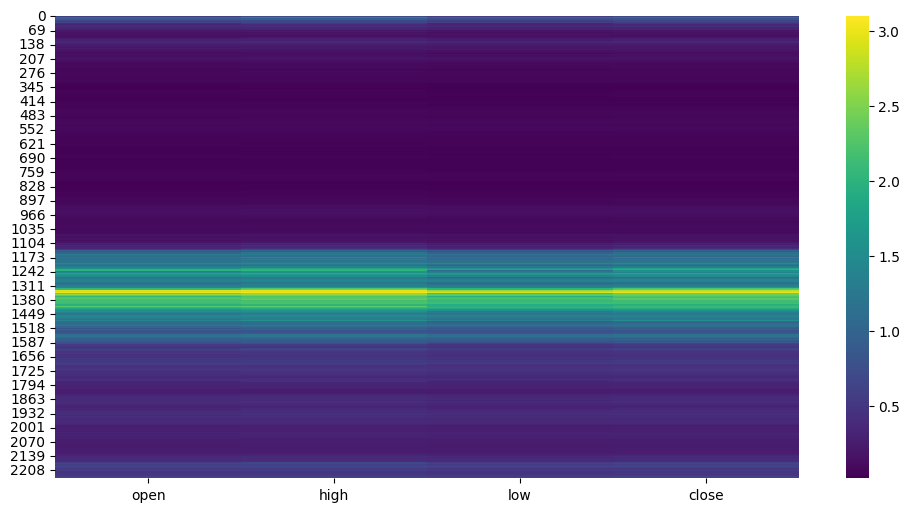

In [ ]:
plt.figure(figsize=(12,6))
sns.heatmap(db,cmap='viridis')

**Definindo o Conjunto de Teste dos Dados não Tratados**

É definido o conjunto train e test da aplicação.

In [ ]:
target_column = ['close']
predictors = list(set(list(db.columns))-set(target_column))

entrada_X = db[predictors].values
saidaDesejada_y = db['close'].values

X_train, X_test, Y_train, Y_test_test = train_test_split(entrada_X, saidaDesejada_y, test_size=0.3, random_state=44)

print("Conjunto de treinamento:")
print(X_train.shape);
print("Conjunto de teste:")
print(X_test.shape)

Conjunto de treinamento:
(1572, 3)
Conjunto de teste:
(675, 3)


**Aplicando os Dados não Tratados no Modelo**

É exemplificado o conjunto de test e train para os dados que não foram tratados no modelo de treinamento da rede neural.

In [ ]:
clf = MLPClassifier(solver='lbfgs', alpha=1e-5, hidden_layer_sizes=(3, 2), random_state=1)
clf.fit(X_train,y_train)

predict_train = clf.predict(X_train)
predict_test = clf.predict(X_test)


ValueError: Unknown label type: (array([0.1078  , 0.04265 , 0.3928  , ..., 0.260557, 0.266449, 0.40069 ]),)

**Verificando os Resultados**

Nesse passo é possivel verificar os resultados do modelo de treino da rede neural, juntamente com o plot do gráfico da rede neural.

In [ ]:
cm = confusion_matrix(y_test,predict_test)
sns.heatmap(cm,annot=True,fmt="d")
print(classification_report(y_test,predict_test))

**Modelo não Performou Bem com Apenas 66% de Acerto**

No entanto, após a execução e plotagem do gráfico é possível verificar que o modelo de treinamento não foi capaz de performar muito bem, acertando somente 66% de previsão.

**Tratamento dos Dados**

Após verificar que o modelo não performou bem, decidimos normalizar e balancear o cojunto de dados disponiveis na base de dados de Diabetes.




In [ ]:
db.dropna()

treated_target_column = ['Outcome']
treated_predictors = list(set(list(db.columns))-set(treated_target_column))
db[treated_predictors] = db[treated_predictors]/db[treated_predictors].max()
print("Estatística descritiva das variáveis normalizadas:")
db[treated_predictors].describe().transpose()


**Informações dos Tipo de Dados**

In [ ]:
db.info()

In [ ]:
plt.figure(figsize=(12,6))
sns.heatmap(db,cmap='viridis')

**Setando o novo conjunto de treino e teste**

Após normalizar os dados, realizamos novamente o treinamento dos dados e treino.



In [ ]:
treated_target_column = ['Outcome']
treated_predictors = list(set(list(db.columns))-set(treated_target_column))

treated_entrada_X = db[treated_predictors].values
treated_saidaDesejada_y = db['Outcome'].values

treated_X_train, treated_X_test, treated_y_train, treated_y_test = train_test_split(treated_entrada_X, treated_saidaDesejada_y, test_size=0.3, random_state=43)

print("Conjunto de treinamento:")
print(treated_X_train.shape);
print("Conjunto de teste:")
print(treated_entrada_X.shape)

**Aplicando os Dados Tratados Modelo**

Nesse passo é possivel verificar os dados de treinamento e teste do modelo de treinamento da rede neural artificial.

In [ ]:
clf = MLPClassifier(solver='lbfgs', alpha=1e-5, hidden_layer_sizes=(9, 2), random_state=1, learning_rate='adaptive', max_iter=1500)
clf.fit(treated_X_train,treated_y_train)

treated_predict_train = clf.predict(treated_X_train)
treated_predict_test = clf.predict(treated_X_test)

**Matriz de Confusão**

Neste passo é possivel ver a matriz de confusão, indicando a qualidade do modelo de treinamento atual da base de dados com acurácia de 81%.*italicized text*


In [ ]:
cm = confusion_matrix(treated_y_test,treated_predict_test)
sns.heatmap(cm,annot=True,fmt="d")
print(classification_report(treated_y_test,treated_predict_test))

**Verificando os Resultados**

Acreditamos que esse não são bons resultados para problemas de saúde.

**Utilizando GridSearchCV**

Agora iremos utilizar uma biblioteca chamada GridSearchCV que escolhe os melhores parâmetros para o modelo.

In [ ]:
param_grid = {
     'hidden_layer_sizes': [(10,30,10),(20,)],
    'activation': ['tanh', 'relu'],
    'solver': ['sgd', 'adam'],
    'alpha': [0.0001, 0.05],
    'learning_rate': ['constant','adaptive']
    }

GridSearchCV_clf = GridSearchCV(MLPClassifier(random_state=1, max_iter=1000), param_grid, cv = 10, scoring='accuracy')
GridSearchCV_clf.fit(treated_X_train, treated_y_train)

treated_predict_train = clf.predict(treated_X_train)
treated_predict_test = clf.predict(treated_X_test)

print('Melhores hiperparâmetros')
print(GridSearchCV_clf.best_params_)

print('Melhor acurácia')
print(GridSearchCV_clf.best_score_)

A biblioteca GridSearchCV achou os seguintes parâmetros para a melhor acurácia:

{'activation': 'relu', 'alpha': 0.05, 'hidden_layer_sizes': (10, 30, 10), 'learning_rate': 'constant', 'solver': 'adam'}


In [ ]:
bp_clf = MLPClassifier(solver='lbfgs', alpha=1e-5, hidden_layer_sizes=( 9, 2), random_state=1, learning_rate='adaptive', max_iter=1500)
bp_clf.fit(treated_X_train,treated_y_train)

treated_predict_train = clf.predict(treated_X_train)
treated_predict_test = clf.predict(treated_X_test)

In [ ]:
cm = confusion_matrix(treated_y_test,treated_predict_test)
sns.heatmap(cm,annot=True,fmt="d")
print(classification_report(treated_y_test,treated_predict_test))

Infelizmente a biblioteca GridSearchCV não conseguiu achar os melhores parametros.

**Comparação com outros modelos:**

Utilizando o modelo RandomForestClassifier, é possível alcançar resultados melhores:

https://www.kaggle.com/code/suyashpratapsingh/eda-prediction-on-diabetes-prediction

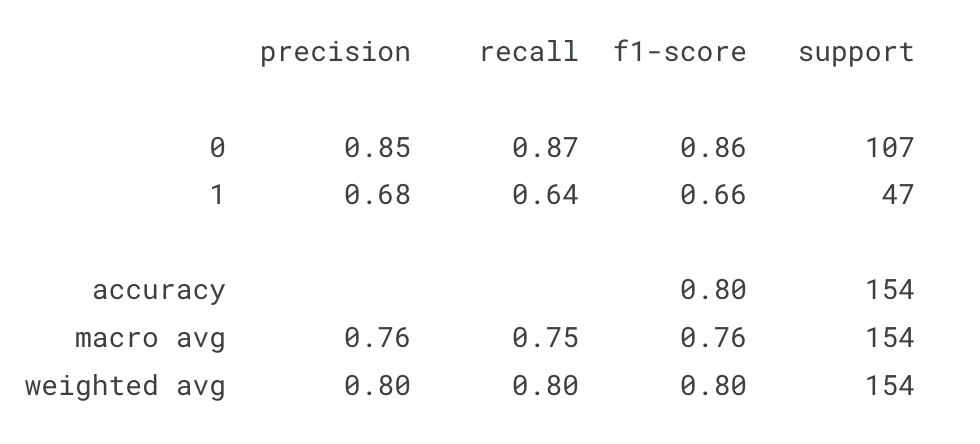



Utilizando o modelo KNN é possível conseguir um resultado um pouco inferior:

https://www.kaggle.com/code/skmv2022/using-k-nearest-neighbours-for-diabetes

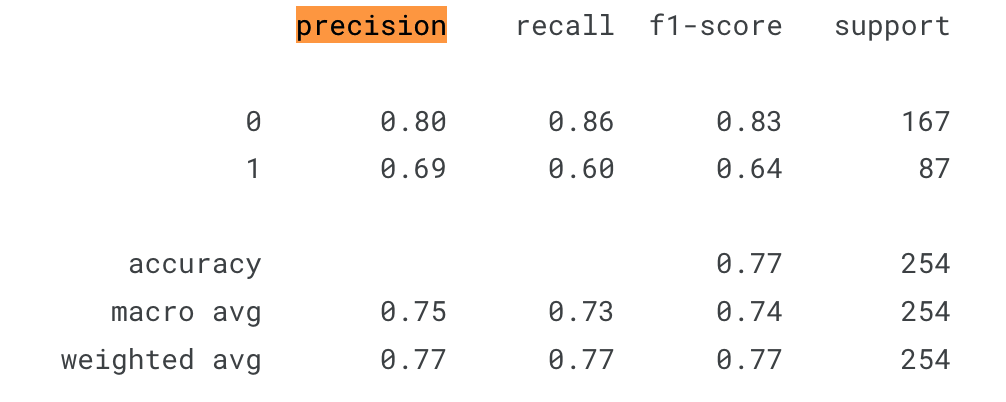

**Conclusão**

O modelo de rede neural multilayer perceptron performa próximo de outros modelos de machine learning. Com o aumento e entendimento dos dados para melhor manipulação e a descoberta de melhores parâmetros, acreditamos ser possível que o resultado alcance resultados de acurâcia e precisão de mais de 90%